In [1]:
import pandas as pd
from neuralNetworkFromScratch import NeuralNetworkFromScratch
import h5py
from PIL import Image
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple binary classification

In [3]:
data = load_wine()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=['class'])
df = pd.concat([features, target], axis=1)

# Dropping one class for binary classification
df = df[df['class'] != 2]
features = df.drop('class', axis=1)
target = df[['class']]

In [4]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [5]:
# Train - Test Split
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

## 3. Prediction

In [13]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 4, 2, 1], task='binary_classification', learning_rate=1e-1, n_epochs=10000, print_cost=True, initialization='He')

Cost after iteration 0: 0.007793992125393581
Cost after iteration 1000: 1.0389630432630525e-07
Cost after iteration 2000: 2.636586150838046e-08
Cost after iteration 3000: 1.0459301723779015e-08
Cost after iteration 4000: 4.92436245280689e-09
Cost after iteration 5000: 2.521449649684606e-09
Cost after iteration 6000: 1.3504699944016745e-09
Cost after iteration 7000: 7.408232307699722e-10
Cost after iteration 8000: 4.109880705365783e-10
Cost after iteration 9000: 2.2828426663233233e-10
Cost after iteration 9999: 1.256523865083569e-10


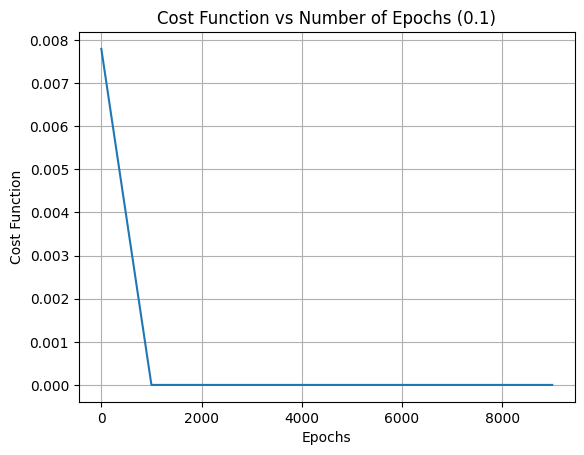

In [14]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, optimizer='adam', mini_batch_size=None, decay=(0.3, 5000))

In [15]:
pred_train = model.predict(train_x, train_y)

Accuracy: 0.9999999999999999


In [16]:
pred = model.predict(test_x, test_y)

Accuracy: 0.9534883720930234


# Example 2: Image recognition

## 1. Imports

In [4]:
def load_data():
    train_dataset = h5py.File('../data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('../data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes

    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [5]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

y = 0. It's a non-cat picture.


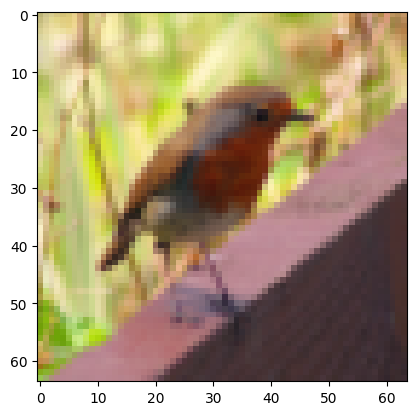

In [6]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

## 2. Preprocessing

In [7]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


## 3. Training

In [30]:
model = NeuralNetworkFromScratch(layers_dims=[12288, 20, 7, 5, 1], task='binary_classification', learning_rate=0.0075, n_epochs=3000, print_cost=True, initialization='He')

In [31]:
parameters, costs = model.fit(train_x, train_y, plot_cost_function=False, optimizer='gd', mini_batch_size=None)

Cost after iteration 0: 0.003308668525904309
Cost after iteration 100: 0.0028972640155336743
Cost after iteration 200: 0.0022989508856728074
Cost after iteration 300: 0.0019473751465910038
Cost after iteration 400: 0.0014776603850171763
Cost after iteration 500: 0.001152100763287801
Cost after iteration 600: 0.001474471126436239
Cost after iteration 700: 0.00048097111101902054
Cost after iteration 800: 0.00028397353629357484
Cost after iteration 900: 0.00019876332516161489
Cost after iteration 1000: 0.00015606607102412065
Cost after iteration 1100: 0.00012535694253430952
Cost after iteration 1200: 0.0001008693388967433
Cost after iteration 1300: 8.227532874058144e-05
Cost after iteration 1400: 6.776782205968884e-05
Cost after iteration 1500: 5.831587618186086e-05
Cost after iteration 1600: 5.205194640185669e-05
Cost after iteration 1700: 4.730962585524443e-05
Cost after iteration 1800: 4.36655259864215e-05
Cost after iteration 1900: 4.074854829972486e-05
Cost after iteration 2000: 3.82

In [29]:
pred_train = model.predict(train_x, train_y)

Accuracy: 0.6555023923444976


## 4. Inference

In [13]:
pred_test = model.predict(test_x, test_y)

Accuracy: 0.5800000000000001


In [13]:
my_image = "my_image.jpg" # change this to the name of your image file
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
num_px = 64

fname = "../data/" + my_image
image = np.array(Image.open(fname).resize((num_px, num_px)))
plt.imshow(image)
image = image / 255.
image = image.reshape((1, num_px * num_px * 3)).T

my_predicted_image = model.predict(image, my_label_y)

print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

NameError: name 'np' is not defined